Psuedocode: 
Create a matrix of length of T/delta T by L/delta X
define a c

we have the initial 


In [1]:
R = 2 #length
T = 1 #Total Time
delta_t = .01 #Timestep
c = 1 #Wavespeed
     
delta_r = .01 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = R/delta_r #number of segments of string
using Plots
using FFTW

In [2]:
gamma = 1.2
#Initial Radius
r = zeros(Int(nrsteps)+2, 1)
r[1]= -1*delta_r
for i = 1:size(r,1)-1
    r[i+1]=r[i]+delta_r
end

#Time
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i = 1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end

#Equilibrium Quantities

#Equilibrium density
rho_0 = zeros(Int(nrsteps)+2,1)
for i = 1:Int(nrsteps)+2
    rho_0[i] = 10*sin(pi*r[i]/R)/(r[i]/R)
end
rho_0[Int(size(rho_0,1))]=-rho_0[Int(size(rho_0,1)-1)]

#Equilibrium pressure
p_0 = zeros(Int(nrsteps)+2,1)
for i = 1:Int(nrsteps)+2
    p_0[i] = rho_0[i]^2
end

#Mass calculation
M = zeros(Int(nrsteps)+2,1)
M[1] = 0
for i = 3:Int(nrsteps)+1
    M[i+1]=M[i] + (4/3)*pi*(delta_r^3)*rho_0[i]
end

#Equilibrium Gravity
g_0 = zeros(Int(nrsteps)+2)
for i=1:Int(nrsteps)+2
    g_0[i]=M[i]/(r[i]^2)
end


#Zeta_r for normal intervals
Z_r = zeros(Int(nrsteps)+2,Int(ntsteps)+2)
for i=1:Int(nrsteps)+2
    Z_r[i,1:2].=.04*sin(25*pi*r[i])
end

#Initializing the perturbed quantities
rho_prime = zeros(Int(nrsteps)+1,Int(ntsteps)+2)
p_prime = zeros(Int(nrsteps)+1,Int(ntsteps)+2)
dp_prime_dr  = zeros(Int(nrsteps)+1,Int(ntsteps)+2)


#Actual Z calculations
for j = 1:Int(ntsteps)

    #rho_prime calculation
    for i = 1:Int(nrsteps)+1
        rho_prime[i,j+1] = (-1/((r[Int(i+1)]^2)*delta_r))*(((r[Int(i+1)]^2)*rho_0[Int(i+1)]*Z_r[Int(i+1),j])-(r[i]^2)*rho_0[i]*Z_r[i,j])
        print(rho_prime[i,j+1])
    end
    
   #pprime calculation
    for i = 1:Int(nrsteps)+1
        p_prime[i,j] = gamma*p_0[i]/rho_0[i] * rho_prime[i,j]
    end
    
    #dP/dR at normal i
    for i = 1:Int(nrsteps)
        dp_prime_dr[i,j] = (p_prime[i+1,j]-p_prime[i,j])/delta_r
    end
    
    #d^2Z/dt^2
    for i = 1:Int(nrsteps+1)
         Z_r[i,j+2] = (2*Z_r[i,j+1]-Z_r[i,j]+(delta_t^2)*(dp_prime_dr[i]-rho_prime[i,j+1]*g_0[i]))/rho_0[i] 
    end
    #Boundary Condition at surface for Z_r
    Z_r[size(Z_r,1)-1,j+2]=delta_r*(Z_r[Int(size(Z_r,1)-1),j+2]-(2/r[Int(size(Z_r,1)-1)])*Z_r[Int(size(Z_r,1)-1),j+2])
end


NaNNaN-103.42953514163867-32.9834258195537449.96393610162725588.7663338158778463.834463719215044-3.5090206370449555-67.89464106364818-88.56197029386955-53.4123760941503515.0115762514188874.294142199977488.241397960042748.56758561819175-20.549098036107395-77.37693741518976-87.80537553077272-45.67582018906081523.7429287166535879.0088050073430187.2549344580381643.674479064413866-25.761991501664625-79.84336885206798-86.5913760233911-42.140756268364627.0975158444016780.1692247467680585.8162676730200240.87359869386758-27.99207745192999-80.13411475213643-84.93143860514223-39.7655090338234428.57945074959534279.8220971572906783.9389746232703138.75407936827466-28.93966576626747-79.28507202284874-82.84121227111909-37.8008459181665929.12373563914114578.5573258422685381.6407322671361336.88104139799126-29.165904336654766-77.66288357614526-80.34035225876221-35.9782106805302729.0901909714543476.6194991708103478.9431189186121335.08119377159539-28.914104991388367-75.44094849534932-77.4522994067524-34.18

0.96020969653171612.39644190802288342.4242624595711681.0342940952843995-0.9532756815895377-2.372843563250478-2.397291679251731-1.02018000562942720.94504811725141352.34575860245793782.36656480733167161.0043069643331815-0.9353182738570943-2.314513489096091-2.331304749559843-0.9862675517009340.92381878386897642.278241811823242.29050723728298870.9655316876754331-0.9102038164297486-2.2358117918564173-2.242851625464226-0.94139536659966130.89402035347633612.18571821024898672.18656613396401540.9129017259421671-0.8746656554621113-2.1259166273752648-2.119217864784783-0.87871529184579110.85132267344255022.05356049362583142.0373735856005710.8369134805498085-0.8228591247196395-1.9645676712303164-1.9360278895494145-0.78462419120725780.78766462010541041.85287163137388871.80758861592203710.7173588967191576-0.7433782855823877-1.7090528800614582-1.639960390495257-0.6276958125194640.68641592496993081.51765647247646721.4126283386792460.5024365473908857-0.6111220330916075-1.25144373607443-1.087794850710774

-0.12889968957886724-0.1394405664102785-0.066035901347077180.0523633657270269060.146756662591359420.158123854670936930.07418548158698489-0.059901939268947636-0.16541196672186914-0.1762848592538936-0.08072131738167410.068122671840639010.181340218030720560.187936485776863730.08064685695837213-0.07616814679016509-0.18471722142878141-0.17663018504141578-0.060265163088168720.081735914644242990.1485030179792790.09659092856257175-0.01918347406488115-0.078975222634980110.00378230512693083750.183147725902082340.26819969169022770.04822978253014507-0.4877892280700888-0.9904029047696051-0.8565317198126940.250828406922959661.54964523514731670.4693184657262692-6.343868131842045-15.38055996834719620.991904061886533409.79531687930623603.703820232877-3969.18336437231537.138411685577581e-11NaNNaN0.00130095778166471380.0009006239077632049-0.00045802873671322235-0.0013554192726866296-0.0011853567543469226-0.000173110699184708560.00094281095778784810.00142466913774935790.0009813148478070419-8.6499903317978

-1.123864305395653e-5-1.7180262463525575e-5-1.1955354515238165e-59.165060432992392e-71.3266962558111601e-51.741475829605219e-51.0817719766747614e-5-2.480905136334224e-6-1.43794312574206e-5-1.763732933134168e-5-1.0229630676441821e-53.444908879564728e-61.5197074334356079e-51.794101772793132e-59.937519149345232e-6-4.13417905442635e-6-1.5920986405111648e-5-1.8344909552018472e-5-9.833028603159968e-64.6859882625732834e-61.663795705994053e-51.8856752353903922e-59.864237242075183e-6-5.1690206988613574e-6-1.7394636731434515e-5-1.9483698554572114e-5-1.000488639838908e-55.622506777374478e-61.8221532487537957e-52.0234694693739152e-51.0242038110117009e-5-6.071612946050976e-6-1.9142478550332076e-5-2.112119599495162e-5-1.0570558738710493e-56.534380880507308e-62.0179029685200503e-52.2157557247790112e-51.0990478216942493e-5-7.025223919628158e-6-2.1352845954867448e-5-2.336142558929742e-5-1.150570023999732e-57.556877496431776e-62.268722888437009e-52.4754228176910875e-51.2123415049322302e-5-8.141608298330

-0.00025490113149744046-0.000358164368308233-0.00024244967859052899.262549476336732e-50.00048868035634310330.0006825611773164130.00045755592797456807-0.0001807427975871144-0.0009235444705755858-0.0012704798770294015-0.00082735595947070550.00035957851903397530.0016738842955699270.0021900748480807540.001284261259161636-0.0007524461111944939-0.0026179370086778135-0.002760882802429287-0.00074907671848569420.00174837262554890260.0016602577067653507-0.0025972665064078974-0.007569703841381339-0.0044012289743018960.014270363142314030.0410007336668474640.04569583557481745-0.003935625986891649-0.08042585271517794-0.0452542977675460050.21121933466982740.29570223782070837-0.4550597971368511.1453038178427657-17.114149578976278-679.7792663612306699.9941178471458894508.71621753351.4492824392319575e8-1.4435196849770662e85.091488095747252e-21NaNNaN4.973080129840482e-83.300582270375567e-8-1.79952881071327e-8-5.106423658208647e-8-4.42723001581921e-8-6.128675884915274e-93.5869373810486e-85.406968454184632

3.639595513066215e-9-2.23378149099147e-9-7.190418292238635e-9-8.146443095243812e-9-4.210185767644664e-92.6074022121225653e-98.383961092600052e-99.51348876018641e-94.922351698422572e-9-3.0685116012282353e-9-9.86942283087412e-9-1.1220967843529756e-8-5.816325616921811e-93.642040660342968e-91.1731008543756106e-81.3368089266633765e-86.945766682028235e-9-4.360941504632385e-9-1.4080855000670513e-8-1.608739934011051e-8-8.382673654369185e-95.269103916649612e-91.706931081709096e-81.955714116534175e-81.0224244567456625e-8-6.425411908291332e-9-2.0899284150547545e-8-2.4018526008974135e-8-1.2602473372322232e-87.90941413046771e-92.5846320122172414e-82.9799907103024193e-81.56975746711583e-8-9.829278699247842e-9-3.228671097092439e-8-3.73505819057745e-8-1.975670002017348e-81.2332972914205239e-84.073674682354631e-84.728782198037037e-82.511980118868796e-8-1.562396329587023e-8-5.1907093153257995e-8-6.04615472405467e-8-3.225472165776183e-81.9983160435297914e-86.677688351490168e-87.804120644489743e-84.180313

1.2142829030199085e-8-5.725149338917818e-9-2.4618982541726586e-8-3.195132417714343e-8-1.955900535374662e-89.455715898968123e-93.973886423097633e-85.0928861180867386e-83.0429067143878286e-8-1.5710631376969408e-8-6.209375451841334e-8-7.69018662823884e-8-4.2980509870734496e-82.611237916324924e-88.863706060877282e-89.93757455944589e-84.381621262752989e-8-4.29847018538528e-8-9.401548947255351e-8-6.24132152191858e-82.574964941771397e-86.864459738905442e-8-3.4707030756940145e-8-2.6032850402999664e-7-3.882062660517584e-7-1.0000760701027992e-77.280398318215997e-71.6933925522875665e-61.81980409466385e-69.1138266595585e-8-3.48803219097217e-6-6.9557192577713565e-6-6.677043516079931e-63.5402638058005525e-71.2832457964220694e-52.2832918481138494e-51.875911716873e-5-4.802627424451391e-6-3.5470850257481024e-5-4.3143328554451336e-5-5.758905633230799e-64.46941777624797e-52.90981588150154e-6-0.000222287737739557-0.00048775584797638435-0.000262452863498846740.00094951483583463070.00228470859512777070.0007

-2.8839049172949428e-15-1.297398428965411e-14-1.5729076583800582e-14-9.06744873158665e-153.514979452326358e-151.4736121957350437e-141.769589158905042e-141.0062664247389453e-14-4.229160684182078e-15-1.6943985137455533e-14-2.02308945871116e-14-1.1399567625981413e-145.077802572528266e-151.9741808118431614e-142.34980828151283e-141.3164044832994303e-14-6.119478353029574e-15-2.3320320350106155e-14-2.7723005423115997e-14-1.548019968942892e-147.427587204361106e-152.7938250965817816e-143.3217674314965476e-141.8523860215376198e-14-9.099038507200561e-15-3.3952215958482296e-14-4.041692311723638e-14-2.2543383970117558e-141.1265708511996555e-144.1859858931026626e-144.9931970011161694e-142.7890993132739526e-14-1.4110610887976467e-14-5.236332950095287e-14-6.263003158371286e-14-3.5069879711582954e-141.789147764518718e-146.646390099334527e-147.975373943020246e-144.4805380091200985e-14-2.2975792578023765e-14-8.560452000095196e-14-1.0310191403612057e-13-5.815333680463029e-142.9893526935125476e-141.1188668

-8.816162758609471e-14-5.169366433758486e-142.592269059858606e-141.0233114628660692e-131.2732334646440673e-137.417165690720346e-14-3.799225154474777e-14-1.4742426431198849e-13-1.8187757713788847e-13-1.0427604980308921e-135.571290444500666e-142.0833097993511048e-132.520573091480057e-131.394227948883012e-13-8.108127372144014e-14-2.807567698102532e-13-3.2482810767375137e-13-1.6448165998796024e-131.1540327283733873e-133.3658715428068497e-133.440526738681099e-131.2608629804406763e-13-1.5593240133867183e-13-2.7441822896278926e-13-1.2561051024767067e-131.3958448472104189e-131.8566448016913442e-13-2.1995694992265746e-13-8.804287317344522e-13-1.1081321576692576e-12-1.4390467788742508e-132.0632810665739407e-124.2521756289999705e-124.125977949646254e-12-1.5757678788811427e-13-7.858525771397005e-12-1.4430962821808213e-11-1.2950454147616036e-111.277449217310963e-122.4882842814368375e-114.373034637693967e-113.788611084436777e-11-4.884816400041774e-12-7.311423713776169e-11-1.2540907630516067e-10-1.06

-5.181651767288898e-12-4.170957259693443e-128.353832024801354e-138.068235352950004e-121.2878556110592565e-119.967693421736147e-12-2.4873406721059933e-12-1.9290756666262236e-11-2.8824238685853966e-11-1.9832436994345156e-118.103269520807814e-123.8325160381965436e-114.4473911462099775e-111.3480637169734304e-11-2.9844082463044263e-11-2.538353536952443e-116.884420978407063e-111.8859122024996907e-101.216607990167049e-10-3.692640061182207e-10-1.2144242100024054e-9-1.681188714125612e-9-4.683414250663547e-103.251253059541977e-98.001735512669017e-98.961068752559927e-94.4227997962670193e-10-1.6772729155505297e-8-2.8149548381630177e-8-1.1991978637073762e-82.6719146774250943e-81.2256141373013679e-8-1.7424008417920874e-7-4.826532279450644e-7-3.716873583419698e-71.0020912740984123e-63.109600106627861e-61.9040852843957034e-6-5.384441223751575e-64.3504305799050273e-76.497852485830725e-50.00012872507198740624-0.0001182543235755735-7.339492248141604e-50.0025984098370291616-0.006940600976046378-0.02205521

-0.0126138856502117610.0067384139758944460.34294292760852907-1442.9894577342989-1.3805165047640814e74.198033335925157e106.927371174838974e151.2185686824803573e21-1.206359321075732e21-5.466774256810404e-50NaNNaN-2.3785463156872875e-211.7879165616605816e-207.597998919669063e-21-1.1399340306302907e-20-1.8566617826142748e-20-1.0000040123151699e-205.944180378663169e-211.724880524599112e-201.6390012046664148e-204.411282398599106e-21-1.053874335276276e-20-1.8735953543880376e-20-1.4964002899606378e-20-1.5833674382500993e-211.3069898470267311e-201.985237578268433e-201.44042225628979e-20-1.6749458819290182e-22-1.5099394985676483e-20-2.120874611775383e-20-1.446068857509777e-201.4557832619467327e-211.7141098098796858e-202.2993373378516928e-201.5014097108121498e-20-2.5542196513474236e-21-1.9450076885355378e-20-2.5332191505457997e-20-1.603250555280858e-203.6122552269942784e-212.2213282166800387e-202.836262066004274e-201.7540711541799916e-20-4.731887473635892e-21-2.561438739602225e-20-3.2259486090960

-1.548850151531331e-21-8.026034779061296e-224.0578631003585258e-221.3160205728242056e-211.3739371969809424e-216.044117026968071e-22-4.092155814672714e-22-9.492697786219102e-22-7.063862590070116e-22-3.369067654093831e-233.2533186021584265e-22-1.0994078289719716e-22-1.0113871105694482e-21-1.3168378502343492e-21-4.656237811129865e-232.6239168449848008e-214.91314243155438e-214.2746104745651655e-21-6.472613708205693e-22-8.146566360821011e-21-1.3312039360844326e-20-1.0530602354006672e-202.2055597630973064e-211.9862932158854823e-203.0961792980131856e-202.3571719297828517e-20-5.548372537453351e-21-4.4358346722774906e-20-6.772869996276777e-20-5.06683249776116e-201.2571963465668895e-209.53969431296846e-201.4432957120358414e-191.0716784625362007e-19-2.722243980038022e-20-2.0209912398805505e-19-3.048131010312529e-19-2.2588455990450155e-195.780943954362871e-204.268561057449373e-196.440170282392257e-194.7783776759343055e-19-1.220727580849517e-19-9.049628430431899e-19-1.3684517961278681e-18-1.0182946

NaNNaN-6.4201286641182025e-253.623454319423149e-241.6438277185724846e-24-2.2468247166288425e-24-3.784905859454709e-24-2.0978719261854802e-241.1533291510841015e-243.5114878297091e-243.395353673873165e-249.653410971611847e-25-2.1343958178790678e-24-3.8862182538338525e-24-3.1604601727057425e-24-3.8973675979738105e-252.714510363119273e-244.212125579429364e-243.1197937209712616e-242.773868378520032e-26-3.2236146989268476e-24-4.62853884787708e-24-3.2317280084901424e-242.480658053419688e-253.780115092318995e-245.1921313405639415e-243.483919307892262e-24-4.9662895098651445e-25-4.455661792568008e-24-5.955079739109674e-24-3.8872438810337445e-247.536241581329495e-255.3177581046464204e-246.984974265007268e-244.472635334269928e-24-1.0479186766556267e-24-6.4483099577558e-24-8.377226103508873e-24-5.293272131814244e-241.4096849801920892e-247.958367478960493e-241.0269724516015967e-236.431472208861646e-24-1.876351632272099e-24-1.000585900861073e-23-1.2864061253174323e-23-8.011012334303433e-242.498969932

-5.761564652555266e-24-5.8604381026618035e-24-2.15305480588424e-242.3368464260856456e-243.756079031709884e-248.133496440534677e-25-3.2684372459317277e-24-2.553082349320167e-246.240899901915618e-241.8375155702407087e-232.1016185254069932e-231.5106420724142207e-24-3.90772215190767e-23-7.693604064016124e-23-7.238922098052781e-233.5258268251132185e-241.344405337819228e-222.420554659861998e-222.1396243229208657e-22-1.9985289100088394e-23-3.98059589620777e-22-6.926318509536578e-22-5.963951497495279e-226.77950672706796e-231.1122306302493785e-211.9066293091044805e-211.622408460268694e-21-2.0065719249988523e-22-3.033324117023977e-21-5.164229406071543e-21-4.368968268847578e-215.662478169574292e-228.188222138312498e-211.3881220819793602e-201.1687968575347291e-20-1.586744762927897e-21-2.1953289964299338e-20-3.699281494009924e-20-3.087747501215007e-204.5479986877556725e-215.81003387677936e-209.654360478055388e-207.888383231429648e-20-1.374460841066881e-20-1.4858323057506872e-19-2.3827074059864707e-

1.6275642082304373e-145.8534145424663245e-15-3.109498808839202e-14-6.6676452647158e-14-2.1508638484041817e-141.1576387203975348e-13-2.8493405867899283e-14-1.3210988628048048e-12-3.778225163762411e-12-3.224199775931481e-128.038756710071779e-122.0543922990581593e-11-2.4427122966572242e-11-1.3896031490806985e-101.383069436726861e-101.6232681070829537e-91.5219468538973218e-9-8.377268324233327e-94.995424301218712e-91.208015479295503e-7-3.991788478230344e-7-2.226292236111781e-62.4967867421510848e-6-5.616977114472234e-50.00046951589912812454-0.00191254289398219220.0008178780502027566-10.7763618165940561.7472788008327256e69.286809168695553e114.288514864702889e171.74567524947474e234.864734393470558e28-4.815982541914973e28-1.963326935256393e-67NaNNaN-2.797993280975986e-294.5982702341309775e-281.6096234273915126e-28-3.0062597659287295e-28-4.57276231036614e-28-2.356309500148691e-281.580285498313536e-284.340485954451468e-284.0943313798766786e-281.0745416268520463e-28-2.722831093953735e-28-4.8478548

5.739521526092269e-17-9.358506485068972e-17-5.694457975431044e-16-1.1371202243701216e-15-6.868538843968803e-162.292848997097524e-156.8197309646621e-155.801502541167702e-15-7.255762382322012e-15-5.039024655944591e-151.090420688727958e-133.89811882870875e-134.1412505118107704e-13-8.80395835854737e-13-2.5671089327733984e-123.926261315488183e-122.1985064265162026e-11-2.2485276678971836e-11-2.5212447845552393e-10-2.4353655957558696e-112.185105717583288e-9-1.829789789219646e-9-1.4409009488345612e-82.0152209926034477e-73.8679701960144e-7-5.883033533507153e-77.68526884116679e-6-0.000217058970801461060.001543530716241574-0.002959674207865425564.75539171037993.20054379767724e81.6514158601404203e148.01188104313421e193.315466186723348e259.277300109302382e30-9.184327673226456e307.187385462489214e-73NaNNaN-2.2004615888596283e-308.408758418851594e-311.973002350057183e-301.9830912049751336e-31-1.416223546345401e-30-1.478250719687994e-30-3.0357050666467256e-311.0000264822952947e-301.4723643737432874e-3

1.8717668673223567e-329.807478883259686e-33-2.683009549212389e-33-1.1457075473383228e-32-1.3027814647742177e-32-7.910527443338821e-337.078791256690771e-348.70983412034485e-331.2549112219478113e-321.0362107240194997e-322.6908297692628264e-33-7.37338579077236e-33-1.5007566266423268e-32-1.560596203789827e-32-7.335495847194368e-337.000822212674502e-332.0274773321798376e-322.4144551849860507e-321.3915006488983661e-32-7.472941139307483e-33-2.9225047951107833e-32-3.7521770984344744e-32-2.3663544126446846e-328.913494856913442e-334.3699094528062864e-325.851669428764733e-323.861663931345388e-32-1.1692313103079956e-32-6.695017605244702e-32-9.188187474313908e-32-6.21833204843953e-321.6523116795932355e-321.0459666069953123e-311.4577376478621403e-311.0019730302670092e-31-2.468090890015119e-32-1.6640823268421127e-31-2.3439914436829646e-31-1.6285004199409996e-313.84171823145826e-322.6963075255895278e-313.8294872024035607e-312.6830725177664504e-31-6.173726366936362e-32-4.452547209427189e-31-6.369461140

1.5614575998898576e-29-1.3048255764054005e-30-2.803100613567769e-29-4.8680408649946275e-29-4.2159991797643646e-293.64633546065498e-307.594832214600857e-291.3157240698884347e-281.1339872961339299e-28-1.0743848372224337e-29-2.048884526829807e-28-3.5137794844965955e-28-2.980545699783542e-283.452255302556404e-295.395119478572776e-288.992601930484565e-287.298459040418407e-28-1.2469365140648896e-28-1.3197728799595805e-27-2.0287802974795556e-27-1.4289036460021023e-275.119065092867541e-282.553663678234695e-272.766367746207457e-273.639220517962687e-28-2.347957171823959e-27-3.3430309700235444e-289.426399450285901e-272.0158311011295943e-261.1579763206187613e-26-3.891870319485355e-26-1.251729293374205e-25-1.7628966244169874e-25-5.833985021555227e-263.3473436423917075e-258.955795021796568e-251.1351259556454276e-242.7718968972943582e-25-2.1410815642724622e-24-5.248237433623718e-24-6.1578989728208895e-24-9.87952791048215e-251.1489043784446449e-232.5005295688172497e-232.4983091080685023e-23-1.46630977

-1.0720716818632706e-36-1.3292106054070802e-35-1.9089669916186068e-35-1.3579654499359336e-351.774070270889776e-361.8917017710634993e-352.7097376500115425e-351.9224455806590052e-35-2.8502292578783817e-36-2.7696707402795655e-35-3.9674247182312574e-35-2.8141550035564506e-354.5548248037153975e-364.170573297115297e-355.984873696562778e-354.2516495997006795e-35-7.327279409679452e-36-6.454024422034861e-35-9.288659835390549e-35-6.61581477855251e-351.1943227056954294e-351.0251495012957057e-341.480459243022828e-341.057630621448716e-34-1.9798248964848466e-35-1.66813422548362e-34-2.416977101566507e-34-1.7312758125346491e-343.345017327760424e-352.772689981291042e-344.026876266679807e-342.8881391653368574e-34-5.76743167855675e-35-4.686552733407785e-34-6.80791369555101e-34-4.874277457301045e-341.0155850339357989e-347.997490513416089e-341.1570956267186755e-338.220533059441701e-34-1.8276650553559983e-34-1.3608013856596533e-33-1.9444823415140767e-33-1.3537180559659469e-333.365082743848655e-342.254282538

-6.431762660910767e-37-8.397940046993178e-36-1.3367635610264996e-35-1.0612280154585505e-351.3247155533981084e-361.7745726695762477e-352.8443440358532366e-352.2730378841806346e-35-2.810162521295015e-36-3.83232192697327e-35-6.174737282825226e-35-4.955965928021071e-356.167816609049377e-368.417763620656566e-351.359085602982673e-341.090945600911511e-34-1.4114178903259332e-35-1.8648804632026483e-34-2.9991496814556956e-34-2.3879949596377046e-343.4087529095226863e-354.102521730279402e-346.492495869161708e-345.037478271738493e-34-8.83998419370218e-35-8.67594309430682e-34-1.3124258734571855e-33-9.455899025199602e-342.5112523725930194e-341.6221680833004434e-332.125596056392365e-331.126799280155176e-33-7.935991295983899e-34-1.8536237694500122e-33-4.64951108437806e-342.5344848975539016e-332.793700587299671e-33-5.018313386552673e-33-2.0494444244958897e-32-3.0538049189312227e-32-1.0769686118502838e-325.655737687355138e-321.50525843618133e-311.8753107036502846e-314.3994897718035675e-32-3.4458739605903

2.1823785679891492e-17-1.67195643995396e-16-1.436497816656079e-15-2.1229153340493195e-153.655607620038978e-15-6.130949547472266e-14-3.995542229586938e-135.844086761785024e-13-2.092092664537912e-14-1.600046102337052e-116.237856758055553e-10-1.3306603997816321e-98.26839869697625e-10-3.425225195347358e-70.0001053443196142330761.231333737992943.75896495041021e72.2512972870070066e131.2978726097068085e197.055619548181639e243.4873203734442545e301.450966934518346e364.065492042959096e41-4.024749707312082e413.4179591826559503e-97NaNNaN-1.6055304624543622e-403.6143431241896057e-411.590776749983354e-402.5599981950152315e-41-1.1195863326078394e-40-1.2378290098814132e-40-2.778775551545544e-418.433719900519961e-411.2787871068259071e-407.709876808260919e-41-2.795093351897269e-41-1.1423070449582385e-40-1.2429911487024411e-40-5.147363116433127e-415.769131112312727e-411.333075414834843e-401.2570048693216059e-403.650496821423737e-41-8.12209304118514e-41-1.5425392564396333e-40-1.3373574449029075e-40-2.6583

1.584294655772105e-401.200098283301942e-40-1.5257910532460466e-41-1.8408056240046974e-40-2.785278036447782e-40-2.0789372360843364e-403.0764493952376237e-413.2158247495414967e-404.74875560495012e-403.4144949116904694e-40-6.515213287559754e-41-5.286437848759996e-40-7.321971536499662e-40-4.7259822027590336e-401.4708742735252453e-407.161668185332736e-407.828829999429405e-402.592122207538481e-40-3.5979038428463107e-40-2.814125995311728e-407.940027161078595e-401.9043320766105055e-399.657611848635109e-40-3.5836039679756055e-39-1.0190809733666362e-38-1.272232371960569e-38-2.8518456824180442e-392.2607599332702214e-385.259426125596207e-385.896862439344064e-389.157700375843239e-39-1.0375747510781818e-37-2.27610605586908e-37-2.4553359550051278e-37-3.119556960870731e-384.316582619417463e-379.234929744538687e-379.779471416916546e-371.086098507725484e-37-1.7223158495564654e-36-3.6285769698721165e-36-3.788925685042749e-36-3.634275291512524e-376.686336955258014e-361.383730948228819e-351.414918966131828

6.402284754543484e-442.0729944464254892e-423.485866271369703e-422.9343462309091883e-42-1.3962200756376513e-43-4.653402654477622e-42-7.875410538397367e-42-6.667352917833088e-423.20848697677471e-431.0683498177279071e-411.8149350426632833e-411.5400748593300292e-41-7.961527241963414e-43-2.4899877447463177e-41-4.22487023854635e-41-3.569762716665711e-412.200047914280716e-425.81250303831255e-419.752032639208769e-418.092502834479226e-41-6.943115011767886e-42-1.3227613421199908e-40-2.1449243848517017e-40-1.6883961972422494e-402.5113671960190297e-412.7497768712602726e-404.022070711522079e-402.623995984144411e-40-1.0193686617659066e-40-4.1210416852011946e-40-3.324863208118251e-401.5224661287484798e-404.4949467751939645e-40-3.884004811645679e-40-2.629127874243139e-39-4.524194505676699e-39-2.088288619109815e-398.31529333578516e-392.4370166617232037e-383.2495647653833927e-389.957762934597363e-39-5.85620940555982e-38-1.516111869342142e-37-1.8814614389216256e-37-4.737879695201088e-383.3767140619824254

-1.2068736320517505e-32-2.1080079559678788e-32-3.559619530612555e-344.3299031264160135e-32-2.1175285896794446e-32-4.676381051576289e-31-1.332398385091526e-30-1.3643722119953635e-302.9117732417502507e-301.4878619494044541e-292.825415316079554e-291.5511426500170996e-29-5.411105663456947e-29-1.220141957547019e-285.238137714294486e-295.211014903139865e-28-4.1291264465112925e-28-7.862109677516394e-27-2.4629035467129933e-26-2.672405927613973e-265.512708101844706e-262.0809822370946247e-25-4.51276934379317e-26-1.2430781128533307e-249.6782127736206e-252.4868714037206555e-237.901166939939116e-234.617606621590774e-23-1.451637403802645e-221.6543133525838989e-211.2307440816012785e-202.0459666503337528e-20-3.312374567911863e-203.2805591302315416e-193.675953539116301e-184.9712727218802346e-18-9.31517412389659e-183.799303047270433e-168.204045432249092e-16-1.4542710982232885e-141.303966844522478e-14-8.757334482809657e-134.591441785357823e-138.599838731802077e-111.5806007419143423e-90.001065215684618894

-5.491774954862814e-49-4.5306657238154395e-49-3.8539542277554056e-504.881052740635887e-498.04576433827829e-496.564039404442728e-493.6840838372835297e-50-7.528392130917332e-49-1.2284132541691887e-48-9.960881448805056e-49-3.347802405342405e-501.2019375078651928e-481.951271577675071e-481.5780252915897982e-482.522689001058857e-50-1.9855914170553194e-48-3.217362348996176e-48-2.600585399524525e-48-5.099173794777311e-513.3885769309208675e-485.489592452553893e-484.43910524054498e-48-4.301337689021811e-50-5.955845235010413e-48-9.649546024950846e-48-7.803062748649309e-481.585400667188617e-491.0726933909873702e-471.7356734042573384e-471.4002877501727681e-47-4.447889512518466e-49-1.9631573406432673e-47-3.1594671934657854e-47-2.528655209323496e-471.1933851917635005e-483.5965594429476815e-475.704089071232733e-474.47036250374665e-47-3.292000977018722e-48-6.402118110483153e-47-9.783393394104198e-47-7.254085661189006e-479.639090395153129e-481.0290599491222218e-461.409859542127158e-468.585315268777151e-

-1.012646005926943e-34-5.754097790632533e-351.9330279973799e-345.604490494474851e-344.574177090760125e-34-6.43564259533142e-34-3.44241681505476e-341.0531514295738391e-324.0648275885978344e-325.515570861654242e-32-9.677716914047013e-32-6.249290217624318e-31-1.2691658174602475e-30-5.375543502757215e-312.2562568602638856e-30-3.5100480440946426e-30-4.817050121261696e-29-1.1066854246476189e-281.4746135945927555e-281.4677958173785958e-273.0658778459555198e-27-1.014368331150646e-27-3.590468695675501e-271.1380105527188197e-256.096592206002415e-258.750338226957131e-25-1.5157267409674399e-248.791606546496929e-241.260586408954722e-223.043752458522809e-22-4.201581959783428e-225.133083708429721e-216.783900542990148e-207.423273743643795e-20-1.679462635729067e-191.0530315993696515e-17-2.5253306840468067e-17-6.348877204660178e-167.202902357532312e-16-5.1970139799989945e-149.633152123563743e-138.911436138800498e-116.055370955510181e-538.725340318933052.456395552161418e71.5390299486170064e139.4702308352

-1.5900397629714117e-31-3.814887882158526e-311.1593493932813496e-305.4555303832630695e-30-5.4989891403833605e-30-9.697313073022765e-29-2.866553648568779e-28-1.411385217945628e-285.073419837451496e-28-6.590251764721149e-27-4.9131554624269075e-26-9.462261457612685e-261.407967320003573e-25-5.025886345800873e-25-1.2457962878362791e-23-3.617965509232969e-234.6809335208605364e-23-6.417148544212618e-22-9.181268966648526e-21-8.229329514474245e-212.2305072660735577e-20-1.6517962048252143e-189.537006216830243e-181.1446942304030772e-16-1.4652161751989354e-168.268690706049993e-15-2.653687961667108e-131.7966841309535555e-80.0115472612276882837384.9771330879594.684441053313441e92.935002720958846e151.8060205353611603e211.082522673285134e276.2424226084367905e323.39386146835963e381.6774998478169813e446.979615434772542e491.955635493933401e55-1.9360370893842306e551.7040206819980312e-128NaNNaN-4.538639264137523e-54-4.777262256832461e-546.687144153121141e-544.1948588321895295e-54-2.4556310453376695e-54-5.1

8.267970054700997e-194.104890067606168e-159.273636950952137e-135.951446293694557e-70.38257436248253734244674.725780731241.5520254271573593e119.724111927877517e165.9836235068636905e223.5865643131381045e282.0682108098099422e341.1244386188771629e405.557815592362132e452.3124541907837914e516.479321872347447e56-6.414389336784206e565.652269138822026e-132NaNNaN5.431121261460835e-561.994372443862994e-55-1.5031950665501161e-55-1.3664664399665221e-552.890746461307458e-561.1918722000887383e-558.218666362507474e-56-1.8722914032067131e-56-9.346899056925384e-56-9.074730462068012e-56-2.102061931751893e-566.1543646962492295e-569.9470942156932e-566.864292105029235e-56-9.055238502451434e-57-8.20088346326884e-56-1.023785081776758e-55-5.607289964197824e-562.8599606455439425e-569.841145199861808e-561.0813646178160086e-554.902786226767684e-56-4.458129617557173e-56-1.151522666452273e-55-1.1695169507293031e-55-4.519752164166371e-565.898251664955516e-561.3206196271817329e-551.268911405232717e-554.31706861141053

-4.66616184271392e-47-2.591270804477865e-478.47313482111416e-472.886981431187429e-464.433643945612293e-462.067104604225195e-46-7.929859418190018e-46-2.421607143469665e-45-3.349766448042701e-45-1.1074519257851943e-455.816517491493554e-451.3864099275628728e-441.2635569882655542e-44-5.216211866062218e-45-1.7623506847340304e-444.4686769978639635e-442.284787973656425e-433.1131877221190617e-43-5.12517956323244e-43-3.3524726985511104e-42-7.522767320510624e-42-6.30684071626268e-421.5029619639191602e-416.67984649231773e-411.1732646362456786e-405.826346614530623e-41-2.1344676787840693e-40-4.696022281157483e-401.1917076482023066e-401.711042380126439e-39-1.1716902999780878e-39-2.513266277013561e-38-8.206741969189943e-38-1.0148797685687523e-371.851890641362309e-371.0943217350627224e-362.0018237465940432e-363.0991358078493367e-37-3.151422906268454e-361.829137086237665e-351.29233860347602e-342.6270717035559267e-34-3.6331410916556336e-34-3.348018455607607e-33-6.633131919850517e-333.3684723288733776e-3

5.962769657458357e-321.7995276075092447e-313.496515412217953e-33-2.6069520308500875e-311.0028799514427903e-296.163107050496292e-297.932789590135403e-29-1.505175871517292e-283.697194737311161e-273.131848031050196e-262.720102135296546e-26-7.378252320160532e-264.839583794888331e-241.3317004609282437e-23-2.0114590817138399e-221.549836956574574e-22-7.908696160208596e-21-1.9896688336648016e-191.4921942698150207e-18-1.4558622161653386e-185.240886423482509e-143.357760292716922e-80.02164412237389326513913.548607298038.898422472021992e95.644473092219741e153.536508922395631e212.176151616099968e271.3043782279128324e337.521764488981837e384.089410272874727e442.0212920336594503e508.410040166339684e552.3564296937168773e61-2.332814729388192e612.058100076894266e-142NaNNaN7.089397433375676e-60-3.5318318362684647e-60-4.433245590255732e-602.2311105890951214e-613.305106733002886e-603.0094765732853944e-603.825382856995166e-61-2.35834330611564e-60-3.3155618827017555e-60-1.9290937184879244e-608.403114848055001

8.21626933582109e-62-1.0348290460448923e-61-2.4622322308853357e-61-2.4653209533367777e-61-8.281115560585969e-621.6386677088750532e-613.4557275494554275e-613.308994220524464e-619.201921065929985e-62-2.5805786220319257e-61-5.105252965859388e-61-4.760059815275457e-61-1.118211181794404e-614.167488084547654e-617.952961626335621e-617.301768552791521e-611.477512837355106e-61-6.982573711691959e-61-1.3056614685871336e-60-1.1891286810690406e-60-2.1128212462870166e-611.2193448263066064e-602.2554334912252132e-602.0476908909024014e-603.254473194202572e-61-2.222092721777749e-60-4.0900753818179995e-60-3.7135604485386396e-60-5.36926982300925e-614.222980716266891e-607.762549119586848e-607.061065519067835e-609.413618712371497e-61-8.349872679107375e-60-1.5354075774469987e-59-1.3998616338513474e-59-1.733325078920952e-601.7103627883102783e-593.1457693544111466e-592.8710582154280253e-593.2875336973295414e-60-3.6033865376478396e-59-6.611713032630794e-59-6.017166673581736e-59-6.192184742116605e-607.7106245259

-3.2301514527589307e-622.477087578252115e-614.5449729790194083e-614.115269476877985e-615.441143904520783e-62-4.7918571227875146e-61-8.703653072472954e-61-7.80014910419917e-61-8.900042852835498e-629.276961146046204e-611.6502285690562614e-601.4420268987006808e-601.2209887000588274e-61-1.7248893771809086e-60-2.9144165751688133e-60-2.372496584860499e-60-3.6395115002764e-622.742998140660429e-603.887685133463875e-602.261579717429263e-60-8.020589991508535e-61-1.806974098406468e-601.8440258895612516e-607.453384738862613e-605.463501496220611e-60-1.4567550396380338e-59-4.999758486149869e-59-7.169615527073396e-59-2.8320138762721807e-591.16437126910385e-583.194716427097196e-584.105277977317119e-581.360765839522204e-58-6.474223018399048e-58-1.6741881833293864e-57-2.0760472943792666e-57-6.372817524188372e-583.258565939641336e-578.226163354910693e-571.0037870316468161e-562.93916745868876e-57-1.5792565398102632e-56-3.926914053088332e-56-4.730688863990359e-56-1.3141944643517601e-567.470223360274065e-56

1.4292837876371294e-651.2941496467303262e-652.9898251024141e-66-1.0885327168587288e-65-2.057885648574443e-65-1.8872830220659013e-65-4.2060583935147694e-661.695108186746775e-653.2223590150601995e-652.981354972066751e-656.394452161032922e-66-2.8267805987333245e-65-5.393320129680273e-65-5.023174802137196e-65-1.0339434334132395e-655.000404413337204e-659.568926124960407e-658.965064355068503e-651.771303214685331e-65-9.332487561749192e-65-1.791860005174111e-64-1.6889853256849582e-64-3.2135206682440006e-651.8319693144835832e-643.5324370264661e-643.351801223073655e-646.174163827189343e-65-3.775043006792238e-64-7.318309096224569e-64-6.995216308320928e-64-1.2556229673020502e-648.153953869712551e-641.5908786225192535e-631.532764960873264e-632.698458861631838e-64-1.8433705611111816e-63-3.622271335667212e-63-3.5188618044396526e-63-6.108726040013205e-644.353346656238637e-638.617682956844141e-638.439315999088468e-631.448726759818952e-63-1.0709464393881757e-62-2.134455398024487e-62-2.1049881508501593e-

1.4133161414103724e-39-8.974068050924244e-39-1.0134455090418823e-37-2.7912475773872084e-373.3226683654971842e-372.920813099829147e-36-7.035181858147344e-36-7.459352014437749e-356.055251928569229e-351.8143201394848675e-333.1758928354506645e-34-4.245664716937776e-322.856172816885602e-321.204710247753803e-30-6.989573119000164e-30-7.952877690088364e-297.679838234995147e-29-2.424818680850161e-27-5.376247918683403e-269.319634940727729e-267.728663389707395e-263.366447489672376e-248.432360706143289e-224.999220782345871e-183.2223169416990477e-122.0776924424420757e-61.3404684718329694864067.53895191655.554512479466221e113.5523943949008755e172.2533653102254063e231.4118318338072778e298.687551001959022e345.207289943823123e403.0028106724056645e461.6325590670382225e528.069326423463498e573.357424766395133e639.407250450115348e68-9.312975673149661e688.182793149718816e-160NaNNaN1.363618063729243e-67-4.901785362403221e-671.819453127013543e-672.7100362138706505e-675.058911150012174e-69-1.831957959089516e-6

-1.8172199502531585e-69-2.014720124061245e-69-2.9307925735366513e-69-2.913668542269182e-696.828238635704947e-708.716625413512214e-691.737482341198226e-681.8163127472745715e-682.8091027192645456e-69-2.8242161139136492e-68-5.929001271322719e-68-6.226268699886015e-68-1.3026099588220193e-688.408329211625254e-681.7941934891255147e-671.8892527357301262e-674.260390539470663e-68-2.4499758102696235e-67-5.2726128411352277e-67-5.575151902897475e-67-1.2924056140871479e-677.182380394728966e-671.5567722951151366e-661.655610357654901e-663.890039337169952e-67-2.1481649340581697e-66-4.689831037101961e-66-5.021639534626502e-66-1.189933630613573e-666.600117952091518e-661.4513654617152413e-651.5649216560482966e-653.7265515674668315e-66-2.087827876942849e-65-4.6201734119256796e-65-5.010859088667917e-65-1.1915081843382014e-656.7862805014010735e-651.5071177286149241e-641.6387983858586715e-643.836288376318858e-65-2.249729559516259e-64-4.9829619000924493e-64-5.3924140258078804e-64-1.2019644462045183e-647.47863

1.4311525774080344e-701.625212494825317e-71-1.8633782707903345e-70-3.5260672441988176e-70-3.3910845157579605e-70-6.381938018766895e-713.991616750534976e-707.945607865351402e-707.859707571359457e-701.7010634046610968e-70-8.978845503739372e-70-1.8335858373724648e-69-1.8428073069107933e-69-4.195602428946455e-702.1070045575704606e-694.3682674673960883e-694.4405227500846644e-691.0310141632778473e-69-5.151745036248404e-69-1.0798581878587396e-68-1.108592159194577e-68-2.5949100498703056e-691.3127372742674827e-682.777809549503901e-682.878554228836596e-686.765474450931569e-69-3.486163958071189e-68-7.442282690428783e-68-7.781899054379517e-68-1.8332371110652114e-689.639199299002685e-682.0744867977482275e-672.186920026964973e-675.150184258860186e-68-2.767473551957312e-67-5.994667132874974e-67-6.358945816701759e-67-1.4871380659011675e-678.204808194892545e-671.782571908859193e-661.894852802213514e-664.3316200824535997e-67-2.4853096998054846e-66-5.37598439938942e-66-5.676692904074756e-66-1.22051182670

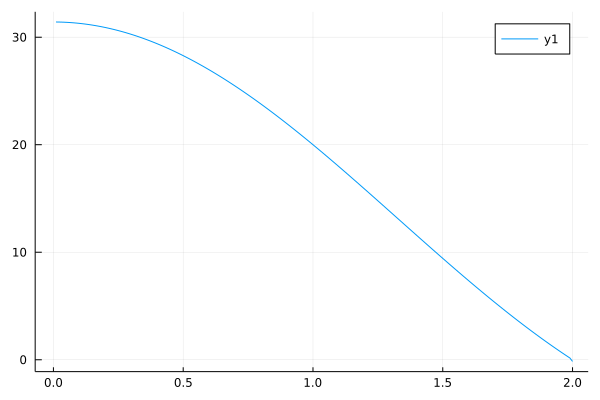

In [179]:
plot(r,rho_0)

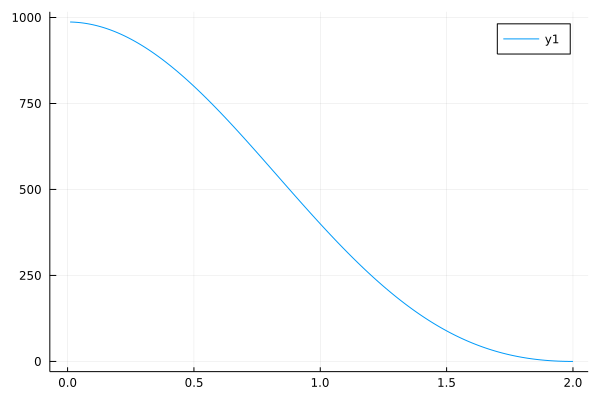

In [180]:
plot(r,p_0)